**Tugas Besar Pengolahan Citra Digital**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# Fungsi menampilkan gambar
def show(title, image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load gambar
img = cv2.imread('kucing.jpg')
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan!")


In [47]:
# 1. Unsharp Masking
def unsharp_mask(image, ksize=(5, 5), alpha=3):
    blurred = cv2.GaussianBlur(image, ksize, 0)
    sharpened = cv2.addWeighted(image, 1 + alpha, blurred, -alpha, 0)
    return sharpened

# 2. Laplacian Filter
def laplacian_sharpen(image):
    channels = cv2.split(image)
    sharpened_channels = []
    for ch in channels:
        lap = cv2.Laplacian(ch, cv2.CV_64F)
        lap = np.uint8(np.absolute(lap))
        sharpened = cv2.add(ch, lap)
        sharpened_channels.append(sharpened)
    return cv2.merge(sharpened_channels)


# 3. High-Boost Filtering
def high_boost_filter(image, k=3):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    mask = cv2.subtract(image, blurred)
    sharpened = cv2.addWeighted(image, 1.0, mask, k, 0)
    return sharpened

# 4. Bilateral Filter
def bilateral_sharpen(image):
    blurred = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    detail = cv2.subtract(image, blurred)
    sharpened = cv2.add(image, detail)
    return sharpened

# 5. Guided Filter
def guided_filter_sharpen(image, radius=10, eps=0.4):
    guided = cv2.ximgproc.guidedFilter(guide=image, src=image, radius=radius, eps=eps)
    detail = cv2.subtract(image, guided)
    sharpened = cv2.addWeighted(image, 1.0, detail, 1.5, 0)
    return sharpened

# 6. Laplacian of Gaussian (LoG)
def log_sharpen(image):
    channels = cv2.split(image)
    sharpened_channels = []
    for ch in channels:
        blurred = cv2.GaussianBlur(ch, (5, 5), 0)
        lap = cv2.Laplacian(blurred, cv2.CV_64F)
        lap = np.uint8(np.absolute(lap))
        sharpened = cv2.add(ch, lap)
        sharpened_channels.append(sharpened)
    return cv2.merge(sharpened_channels)



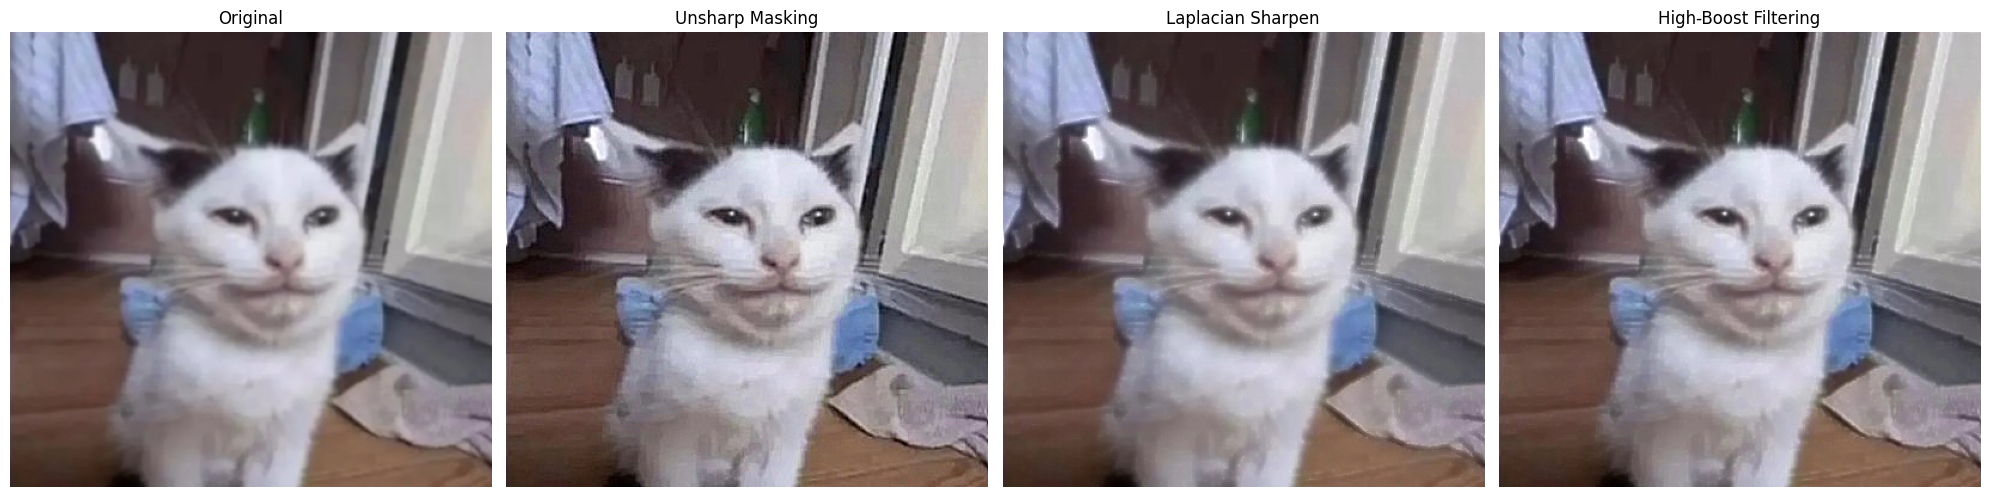

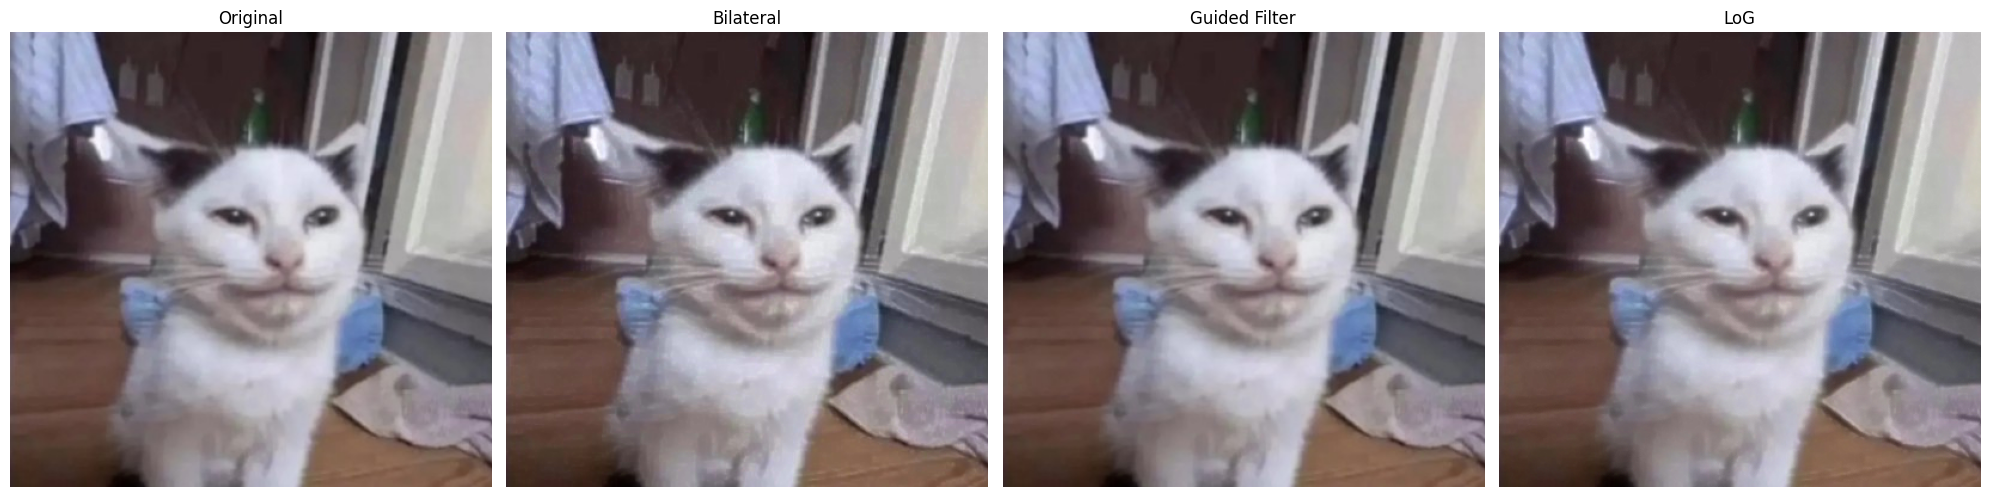

In [64]:
# Terapkan filter
unsharp = unsharp_mask(img)
laplacian = laplacian_sharpen(img)
highboost = high_boost_filter(img)

# Tampilkan hasil
titles = ["Original", "Unsharp Masking", "Laplacian Sharpen", "High-Boost Filtering"]
images = [img, unsharp, laplacian, highboost]

plt.figure(figsize=(20, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

bilateral = bilateral_sharpen(img)
guided = guided_filter_sharpen(img)
log_sharp = log_sharpen(img)

# Visualisasi gabungan
titles = ["Original", "Bilateral", "Guided Filter", "LoG"]
images = [img, bilateral, guided, log_sharp]

plt.figure(figsize=(20, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()